In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("indian_liver_patient_dataset.csv")
print(df.shape)

df.head()

(500, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
df.rename(columns = lambda col : col.strip(), inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [11]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

In [12]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [13]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,44.5860,2.603800,1.117200,296.372000,82.736000,108.820000,6.44480,3.168800,0.960907,1.300000
std,16.5334,5.120238,2.066709,257.461676,194.366775,307.093557,1.08902,0.799741,0.293107,0.458717
min,4.0000,0.400000,0.100000,63.000000,10.000000,10.000000,2.70000,0.900000,0.300000,1.000000
25%,32.7500,0.800000,0.200000,175.000000,23.000000,24.750000,5.70000,2.600000,0.800000,1.000000
50%,45.0000,0.900000,0.300000,205.500000,33.500000,40.000000,6.50000,3.100000,1.000000,1.000000
75%,58.0000,2.200000,1.000000,298.000000,59.250000,79.250000,7.20000,3.800000,1.100000,2.000000
max,85.0000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.60000,5.500000,1.900000,2.000000


In [14]:
#sns.pairplot(df)

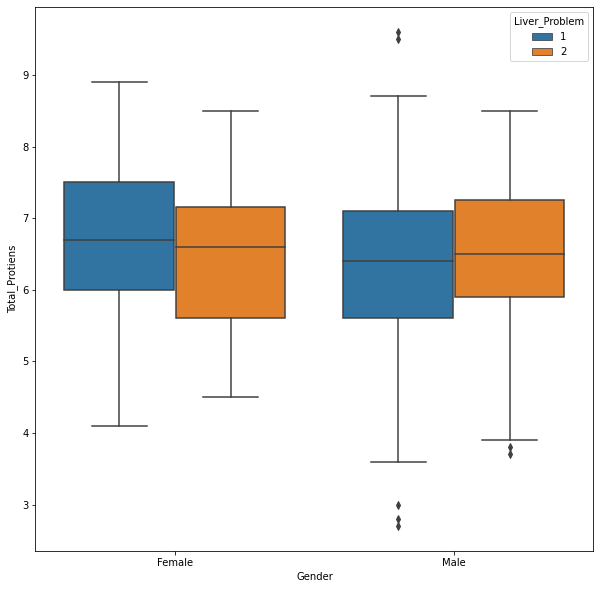

In [15]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = "Gender", y = "Total_Protiens", data = df, hue = "Liver_Problem")
plt.show()

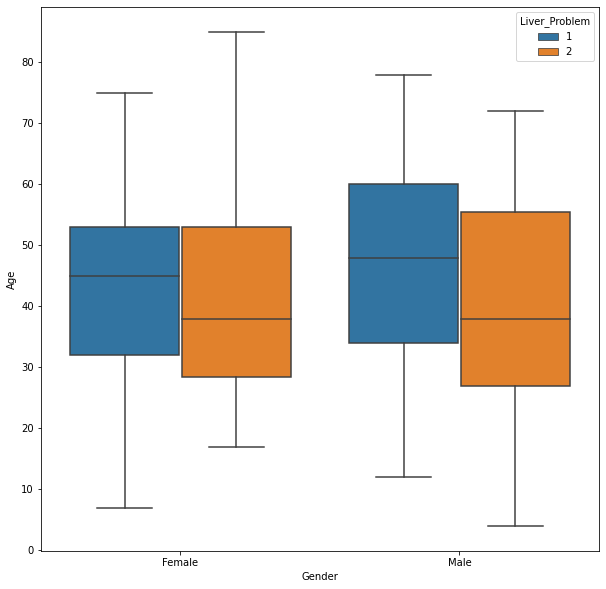

In [17]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = "Gender", y = "Age", data = df, hue = "Liver_Problem")
plt.show()

/home/daksh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

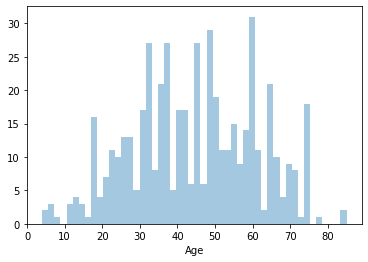

In [18]:
sns.distplot(df["Age"], kde = False, bins = 50)

#### Exploring with respect to Liver Problems

In [19]:

df_liver_problem = df[df['Liver_Problem'] == 1]

df_no_liver_problem = df[df['Liver_Problem'] == 2]


In [20]:
df_liver_problem.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0
mean,46.214286,3.217143,1.419429,328.740000,103.508571,137.597143,6.424000,3.095429,0.926634,1.0
std,15.907228,5.979491,2.382366,286.812806,228.672132,362.565944,1.106685,0.796109,0.289042,0.0
min,7.000000,0.400000,0.100000,63.000000,12.000000,11.000000,2.700000,0.900000,0.300000,1.0
25%,34.000000,0.800000,0.200000,182.750000,25.000000,28.000000,5.700000,2.500000,0.700000,1.0
50%,46.000000,1.100000,0.400000,224.000000,39.500000,47.500000,6.500000,3.100000,0.900000,1.0
75%,58.000000,2.875000,1.400000,329.750000,75.500000,97.750000,7.175000,3.700000,1.100000,1.0
max,78.000000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,1.800000,1.0


In [21]:
df_no_liver_problem.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0
mean,40.786667,1.172667,0.412000,220.846667,34.266667,41.673333,6.493333,3.340000,1.040879,2.0
std,17.378374,1.052507,0.543407,145.292472,25.709703,38.013332,1.048660,0.784412,0.287807,0.0
min,4.000000,0.500000,0.100000,90.000000,10.000000,10.000000,3.700000,1.400000,0.450000,2.0
25%,27.000000,0.700000,0.200000,162.000000,20.000000,21.000000,5.825000,2.900000,0.900000,2.0
50%,38.000000,0.800000,0.200000,185.500000,28.000000,29.000000,6.500000,3.350000,1.000000,2.0
75%,55.000000,1.100000,0.400000,214.000000,38.000000,44.750000,7.200000,4.000000,1.200000,2.0
max,85.000000,7.300000,3.600000,1580.000000,181.000000,285.000000,8.500000,5.000000,1.900000,2.0


In [22]:
for i in df.columns.drop("Liver_Problem") : 
    try : 
        print(f"{i}\t\t\t:\t{df[i].mean()}")
    except : 
        False

Age			:	44.586
Total_Bilirubin			:	2.603799999999999
Direct_Bilirubin			:	1.1172000000000013
Alkaline_Phosphotase			:	296.372
Alamine_Aminotransferase			:	82.736
Aspartate_Aminotransferase			:	108.82
Total_Protiens			:	6.4448
Albumin			:	3.168800000000004
Albumin_and_Globulin_Ratio			:	0.9609072580645165


In [23]:
col_more_avg = []
col_less_avg = []
for i in df.columns.drop("Liver_Problem") :
    try:
        if df_liver_problem[i].mean() >= df_no_liver_problem[i].mean() : 
            col_more_avg.append(i)
        else : 
            col_less_avg.append(i)
    except : 
        pass

In [24]:
print(col_more_avg)
print()
print(col_less_avg)

['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']

['Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


The person having Liver problem has less 'Total_Protiens', 'Albumin', and  'Albumin_and_Globulin_Ratio'.

#### Exploring with respect to Gender and liver problem

In [25]:

df_liver_problem_male = df_liver_problem[df_liver_problem['Gender'] == "Male"]
df_liver_problem_female = df_liver_problem[df_liver_problem['Gender'] == 'Female']

df_no_liver_problem_male = df_no_liver_problem[df_no_liver_problem['Gender'] == "Male"]
df_no_liver_problem_female = df_no_liver_problem[df_no_liver_problem['Gender'] == 'Female']


In [26]:
df_liver_problem_male.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.0
mean,46.992453,3.383019,1.486038,320.252830,116.384906,155.818868,6.341509,3.050189,0.927098,1.0
std,16.037360,6.185845,2.266086,255.369296,254.488887,406.887992,1.089313,0.788080,0.294416,0.0
min,12.000000,0.400000,0.100000,75.000000,12.000000,11.000000,2.700000,0.900000,0.300000,1.0
25%,34.000000,0.800000,0.200000,190.000000,28.000000,31.000000,5.600000,2.500000,0.700000,1.0
50%,48.000000,1.500000,0.500000,237.000000,42.000000,53.000000,6.400000,3.000000,0.900000,1.0
75%,60.000000,3.200000,1.600000,332.000000,84.000000,105.000000,7.100000,3.700000,1.100000,1.0
max,78.000000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,1.720000,1.0


In [27]:
df_liver_problem_female.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0
mean,43.788235,2.700000,1.211765,355.200000,63.364706,80.788235,6.681176,3.236471,0.925187,1.0
std,15.333665,5.285154,2.717422,368.625756,107.502475,146.705657,1.127312,0.809151,0.273282,0.0
min,7.000000,0.500000,0.100000,63.000000,12.000000,11.000000,4.100000,1.600000,0.400000,1.0
25%,32.000000,0.800000,0.200000,173.000000,20.000000,21.000000,6.000000,2.800000,0.800000,1.0
50%,45.000000,0.900000,0.200000,198.000000,26.000000,32.000000,6.700000,3.300000,0.900000,1.0
75%,53.000000,1.400000,0.700000,310.000000,53.000000,77.000000,7.500000,3.900000,1.000000,1.0
max,75.000000,27.200000,12.800000,1896.000000,790.000000,1050.000000,8.900000,5.500000,1.800000,1.0


In [28]:
df_no_liver_problem_male.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0
mean,40.102804,1.274766,0.466355,228.327103,35.906542,45.794393,6.491589,3.349533,1.051504,2.0
std,17.360731,1.195597,0.615207,164.166952,25.721855,42.442800,1.059470,0.774155,0.283266,0.0
min,4.000000,0.500000,0.100000,100.000000,10.000000,12.000000,3.700000,1.400000,0.500000,2.0
25%,27.000000,0.700000,0.200000,165.000000,21.000000,22.500000,5.900000,2.900000,0.900000,2.0
50%,38.000000,0.900000,0.200000,185.000000,29.000000,30.000000,6.500000,3.500000,1.000000,2.0
75%,55.500000,1.300000,0.500000,220.500000,43.000000,51.500000,7.250000,4.000000,1.200000,2.0
max,72.000000,7.300000,3.600000,1580.000000,181.000000,285.000000,8.500000,5.000000,1.900000,2.0


In [29]:
df_no_liver_problem_female.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0
mean,42.488372,0.918605,0.276744,202.232558,30.186047,31.418605,6.497674,3.316279,1.014440,2.0
std,17.509687,0.479214,0.257124,79.836988,25.519606,20.713732,1.033599,0.818224,0.300577,0.0
min,17.000000,0.500000,0.100000,90.000000,10.000000,10.000000,4.500000,1.400000,0.450000,2.0
25%,28.500000,0.700000,0.200000,158.500000,18.000000,18.000000,5.600000,2.800000,0.800000,2.0
50%,38.000000,0.800000,0.200000,188.000000,24.000000,25.000000,6.600000,3.200000,1.000000,2.0
75%,53.000000,0.900000,0.200000,204.000000,32.000000,36.000000,7.150000,3.950000,1.190000,2.0
max,85.000000,2.600000,1.200000,509.000000,160.000000,108.000000,8.500000,4.900000,1.800000,2.0


#### Machine learning steps

In [30]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['Gender'] = enc.fit_transform(df['Gender'])

In [31]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [35]:
x = df.drop("Liver_Problem", axis = 1)
y = df['Liver_Problem']

In [36]:
model = LogisticRegression()
model.fit(x, y)

/home/daksh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

#### importing testing set

In [38]:
df_test = pd.read_csv("indian_liver_patient_new_testdataset.csv")

In [39]:
df_test['Gender'] = enc.fit_transform(df_test['Gender'])

In [40]:
prediction = model.predict(df_test)

In [41]:
prediction = pd.DataFrame(prediction, columns = ['Liver_Problem'])

In [42]:
prediction.to_csv("Sample Submission.csv", index = False)

####  Handle Class Imbalance

In [43]:
#conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import RandomOverSampler


x = df.drop(['Liver_Problem'], axis = 1)
y = df['Liver_Problem']

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_sample(x, y)

y_ros.value_counts()

2    350
1    350
Name: Liver_Problem, dtype: int64

In [45]:
from sklearn.model_selection  import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 100) 

In [46]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

/home/daksh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [47]:
prediction = model.predict(xtest)

In [48]:
print(metrics.confusion_matrix(ytest, prediction))
print()
print(metrics.classification_report(ytest, prediction))
print()
print(metrics.accuracy_score(ytest, prediction))

[[50 48]
 [23 89]]

              precision    recall  f1-score   support

           1       0.68      0.51      0.58        98
           2       0.65      0.79      0.71       112

    accuracy                           0.66       210
   macro avg       0.67      0.65      0.65       210
weighted avg       0.67      0.66      0.65       210


0.6619047619047619
